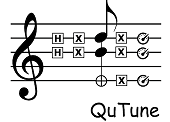

Supplementary material for book chapter: 

**_Quantum Computer Music: Foundations and Initial Experiments_**, by Eduardo R. Miranda and Suchitra T. Basak

(a) This demonstration is implemented in IBM Q's Qiskit. (https://qiskit.org/)

(b) To listen to the music you need run this Notebook alongside "MusicPatch.maxpat". Open the patch provided and make sure it plays musical notes on your computer. This patch sends out MIDI notes to your machine's default MIDI device, via UDP.

(c) Max is available from https://cycling74.com/

In [1]:
# import libraries

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

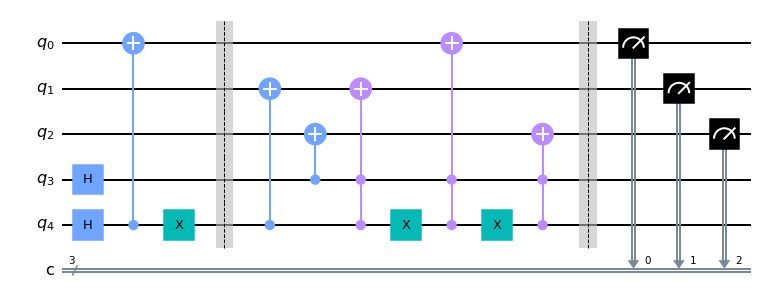

In [2]:
# create the circuit

input_qubits = 3
dice_qubits = 2
classical_bits = input_qubits
three_d_walk = QuantumCircuit(input_qubits + dice_qubits, classical_bits)

# hadamard gates applied at dice qubits q3 and q4
three_d_walk.h(3)
three_d_walk.h(4)

# q4 controls q0
three_d_walk.cx(4,0)
three_d_walk.x(4)
three_d_walk.barrier()
three_d_walk.cx(4,1)
three_d_walk.cx(3,2)
three_d_walk.ccx(4,3,1)
three_d_walk.x(4)
three_d_walk.ccx(4,3,0)
three_d_walk.x(4)
three_d_walk.ccx(4,3,2)
three_d_walk.barrier()

for i in range(classical_bits):
    three_d_walk.measure(i,i)

display(three_d_walk.draw('mpl'))

In [3]:
# function to create the circuit

def create_3_d_ckt(three_d_walk):
    #input_qubits = 3
    #dice_qubits = 2
    #classical_bits = input_qubits
    #three_d_walk = QuantumCircuit(input_qubits + dice_qubits, classical_bits)

    # hadamard gates applied at dice qubits q3 and q4
    three_d_walk.h(3)
    three_d_walk.h(4)

    # q4 controls q0
    three_d_walk.cx(4,0)
    three_d_walk.x(4)
    three_d_walk.barrier()
    three_d_walk.cx(4,1)
    three_d_walk.cx(3,2)
    three_d_walk.ccx(4,3,1)
    three_d_walk.x(4)
    three_d_walk.ccx(4,3,0)
    three_d_walk.x(4)
    three_d_walk.ccx(4,3,2)
    three_d_walk.barrier()

    for i in range(classical_bits):
        three_d_walk.measure(i,i)
        
    return(three_d_walk)

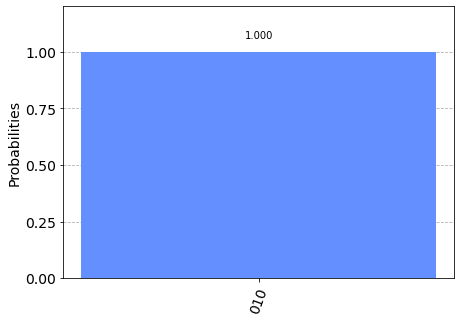

In [4]:
# function to run the circuit
def run_circuit(qc, view_histogram):
    backend = Aer.get_backend('qasm_simulator')
    results = execute(qc, backend=backend, shots=1).result()
    answer = results.get_counts()
    
    if view_histogram:
        display(plot_histogram(answer))
        
    return(answer)

answer = run_circuit(three_d_walk, True)

In [5]:
answer

{'010': 1}

In [6]:
# calculate the next state from the result

def calc_next_state(answer):
    dict_keys = list(answer.keys())

    dict_vals = []
    for i in dict_keys:
        dict_vals.append(answer[i])

    next_state = dict_keys[dict_vals.index(max(dict_vals))]
    
    return(next_state)

next_state = calc_next_state(answer)

next_state

'010'

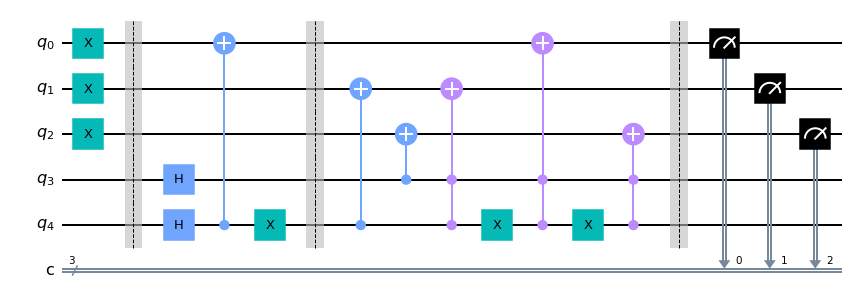

In [7]:
# in this application, gates are used to set the initial values of qubits.
# This is done using the function set_input()

input_qubits = 3
dice_qubits = 2
classical_bits = input_qubits

three_d_walk = QuantumCircuit(input_qubits + dice_qubits, classical_bits)

def set_input(qc, bit_string):
    for i in range(len(bit_string)):
        if bit_string[i] == '1':
            qc.x(i)
    qc.barrier()
            
set_input(three_d_walk, '111')
three_d_walk = create_3_d_ckt(three_d_walk)

three_d_walk.draw('mpl')

In [8]:
# testing the circuit

no_of_loops = 15
next_state = '001'
for i in range(no_of_loops):
    three_d_walk = QuantumCircuit(input_qubits + dice_qubits, classical_bits)
    print(next_state)
    
    set_input(three_d_walk, next_state)
    three_d_walk = create_3_d_ckt(three_d_walk)
    
    answer = run_circuit(three_d_walk, False)
    next_state = calc_next_state(answer)


001
000
001
110
111
110
011
100
011
010
000
010
011
010
110


### Send data to Max

In [10]:
# The same circuit is executed twice:one for generating pitches and once for rhythms

no_of_loops = 30
next_state_pitch = '000'
next_state_rhythm = '000'

pitches = []
rhythms = []
for i in range(no_of_loops):
    
    pitches.append(next_state_pitch)
    rhythms.append(next_state_rhythm)
    
    three_d_walk = QuantumCircuit(input_qubits + dice_qubits, classical_bits)
    set_input(three_d_walk, next_state_pitch)
    three_d_walk = create_3_d_ckt(three_d_walk)
    
    answer = run_circuit(three_d_walk, False)
    next_state_pitch = calc_next_state(answer)[::-1]

    three_d_walk = QuantumCircuit(input_qubits + dice_qubits, classical_bits)
    set_input(three_d_walk, next_state_rhythm)
    three_d_walk = create_3_d_ckt(three_d_walk)
    
    answer = run_circuit(three_d_walk, False)
    next_state_rhythm = calc_next_state(answer)[::-1]

In [11]:
# display the generate pitch and rhythm values
# This step is for my reference to see that the circuit is functionning as expected, i.e, only one bit changes at a time.

print('Pitch','\t', 'Rhythm')
for i in range(no_of_loops):
    print(pitches[i],'\t', rhythms[i])

Pitch 	 Rhythm
000 	 000
010 	 000
011 	 100
001 	 000
001 	 000
011 	 001
011 	 001
111 	 011
011 	 011
010 	 010
010 	 011
000 	 001
010 	 001
011 	 011
011 	 010
001 	 000
000 	 001
000 	 000
010 	 010
000 	 000
000 	 010
100 	 010
101 	 011
111 	 111
101 	 111
001 	 111
011 	 011
111 	 011
110 	 011
110 	 010


### Mapping
#### Pitches, Persian scale in C

In [12]:
# persian_scale = ['C4', 'Db4', 'E4', 'F4', 'Gb4', 'Ab4', 'B4', 'C5']
persian_scale = [60, 61, 64, 65, 66, 68, 71, 72]

pitch_map = persian_scale

#### Rhythms
A rhythmic figure is associated with every state.

In [13]:
# using Max MSP notation
rhythm_options = ['1n', '2dn', '2n', '4dn', '4n', '8dn', '8n', '16n']

rhythm_map = list(range(len(rhythm_options)))

In [14]:
# these are the mapped pitches and rhythms to be sent to Max.

pitches_for_max = []
rhythms_for_max = []
for i in range(len(pitches)):
    pitches_for_max.append(pitch_map[int(pitches[i],2)])
    rhythms_for_max.append(rhythm_map[int(rhythms[i],2)])

### Send notes to Max

In [15]:
import time

# send data to max
from pythonosc.udp_client import SimpleUDPClient

# receive data from max
from socket import socket, AF_INET, SOCK_DGRAM

In [16]:
# checking what the persian scale sounds like

client = SimpleUDPClient("127.0.0.1", 5005)

for i in range(8):
    send_pitch = pitch_map[i]
    client.send_message("pitch", send_pitch)
    print(send_pitch)
    time.sleep(0.5)
        
print('data sent!')

60
61
64
65
66
68
71
72
data sent!


### How the Python-Max Communication works

1. Python sends a note to Max.
2. Max plays the note.
3. Once the note is done playing, Max sends a message to trigger the next note.
4. Once this message is received, python sends the next note to max.

In [17]:
# Receiving the "trigger" message from Max
# Run this cell and press the "Trigger" message box in the max patch

HOST = '127.0.0.1'   
PORT = 5000

# receiving data from max
s = socket(AF_INET, SOCK_DGRAM)
s.bind((HOST, PORT))

message, address = s.recvfrom(8192)
print(f"message: {message}\nfrom: {address}")
s.close()

message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)


In [18]:
client_pitch = SimpleUDPClient("127.0.0.1", 5005)
client_rhythm = SimpleUDPClient("127.0.0.1", 5006)

for i in range(len(pitches_for_max)):
    send_pitch = pitches_for_max[i]
    client_pitch.send_message("pitch", send_pitch)
    print(send_pitch)
    
    send_rhythm = rhythms_for_max[i]
    client_rhythm.send_message("rhythm", send_rhythm)
    print(send_rhythm)
    
    s = socket(AF_INET, SOCK_DGRAM)
    s.bind((HOST, PORT))
    message, address = s.recvfrom(8192)
    print(f"message: {message}\nfrom: {address}")
    s.close()
     
print('data sent!')

#----------------------------------------------------------------------------
# NOTE: if you do not hear anything click on a key of piano in the Max patch.
#----------------------------------------------------------------------------

60
0
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
64
0
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
65
4
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
61
0
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
61
0
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
65
1
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
65
1
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
72
3
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
65
3
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
64
2
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
64
3
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
60
1
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
64
1
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
65
3
message: b'trigger\x00,\x00\x00\x00'
from: ('127.0.0.1', 53254)
65
2
message: b'trigger\x00,\x00\x